In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns

def set_fig_size(size=(6,4)):
    sns.set(rc={'figure.figsize': size})
    sns.set_style("white")
    
def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")
    
import glob
import json
import os
import sys
import shutil

set_fig_size()

# nima appeal and quality evaluation

In [3]:
def extract_baseimg(x):
    bn = os.path.basename(x).replace("_BSRGANx2", "").replace("_BSRGAN", "")
    
    if "KXNet" in x:
        bn = bn.replace("_.png", ".png")
    
    return os.path.splitext(bn)[0]

def read_json(x):
    dj = pd.read_json(x)
    #dj["src"] = os.path.basename(x)
    dj["base_id"] = dj["image_id"].apply(extract_baseimg)
    
    dj["model"] = "_".join(os.path.basename(os.path.splitext(x)[0]).split("_")[1:-1])
    dj["factor"] = os.path.basename(os.path.splitext(x)[0]).split("_")[-1]
    dj["image_key"] = dj["model"] + "_" + dj["factor"] + "_"  + dj["base_id"] 
    return dj

dnima_appeal = pd.concat(list(map(read_json, glob.glob("../upscaling_features/nima_appeal/*.json"))))
dnima_appeal = dnima_appeal.rename(columns={"mean_score_prediction": "nima_a"})

d(dnima_appeal)

dnima_quality = pd.concat(list(map(read_json, glob.glob("../upscaling_features/nima_quality/*.json"))))
dnima_quality = dnima_quality.rename(columns={"mean_score_prediction": "nima_q"})

d(dnima_quality)

dnima = pd.merge(dnima_quality, dnima_appeal[["nima_a", "image_id"]], left_on="image_id", right_on="image_id")
d(dnima)

image_id    nima_a                 base_id  \
0                    IMG_8918_BSRGAN  5.552331                IMG_8918   
1      IMG_20170907_182814017_BSRGAN  5.606283  IMG_20170907_182814017   
2                   IMG_4922__BSRGAN  5.870636               IMG_4922_   
3                    IMG_6426_BSRGAN  5.857929                IMG_6426   
4                     MG_9180_BSRGAN  4.720848                 MG_9180   
..                               ...       ...                     ...   
131                IMG_9320_BSRGANx2  4.804656                IMG_9320   
132  IMG_20190604_212833103_BSRGANx2  4.912204  IMG_20190604_212833103   
133                IMG_5656_BSRGANx2  5.422368                IMG_5656   
134                IMG_6909_BSRGANx2  5.669992                IMG_6909   
135                IMG_5050_BSRGANx2  5.439781                IMG_5050   

      model factor                         image_key  
0    BSRGAN     x4                BSRGAN_x4_IMG_8918  
1    BSRGAN     x4  BSRGAN_x4_IMG_20170907_182814017  
2    BSRGAN     x4               BSRGAN_x4_IMG_4922_  
3    BSRGAN     x4                BSRGAN_x4_IMG_6426  
4    BSRGAN     x4                 BSRGAN_x4_MG_9180  
..      ...    ...                               ...  
131  BSRGAN     x2                BSRGAN_x2_IMG_9320  
132  BSRGAN     x2  BSRGAN_x2_IMG_20190604_212833103  
133  BSRGAN     x2                BSRGAN_x2_IMG_5656  
134  BSRGAN     x2                BSRGAN_x2_IMG_6909  
135  BSRGAN     x2                BSRGAN_x2_IMG_5050  

[1496 rows x 6 columns]

image_id    nima_q                  base_id    model  \
0                   IMG_9320  4.968366                 IMG_9320  lanczos   
1                   IMG_5127  4.329817                 IMG_5127  lanczos   
2                   IMG_6222  4.103301                 IMG_6222  lanczos   
3                   IMG_4480  5.606127                 IMG_4480  lanczos   
4                   IMG_6010  4.623403                 IMG_6010  lanczos   
..                       ...       ...                      ...      ...   
131  IMG_20190831_145604539_  4.644447  IMG_20190831_145604539_    KXNet   
132     IMG-20151029-WA0005_  5.463587     IMG-20151029-WA0005_    KXNet   
133                 MG_9163_  5.805008                 MG_9163_    KXNet   
134                IMG_7893_  4.112825                IMG_7893_    KXNet   
135                IMG_1665_  5.468894                IMG_1665_    KXNet   

    factor                         image_key  
0       x2               lanczos_x2_IMG_9320  
1       x2               lanczos_x2_IMG_5127  
2       x2               lanczos_x2_IMG_6222  
3       x2               lanczos_x2_IMG_4480  
4       x2               lanczos_x2_IMG_6010  
..     ...                               ...  
131     x2  KXNet_x2_IMG_20190831_145604539_  
132     x2     KXNet_x2_IMG-20151029-WA0005_  
133     x2                 KXNet_x2_MG_9163_  
134     x2                KXNet_x2_IMG_7893_  
135     x2                KXNet_x2_IMG_1665_  

[1496 rows x 6 columns]

image_id    nima_q      base_id    model factor  \
0               IMG_9320  4.968366     IMG_9320  lanczos     x2   
1               IMG_9320  4.968366     IMG_9320  lanczos     x2   
2               IMG_9320  4.968366     IMG_9320  lanczos     x2   
3               IMG_9320  4.968366     IMG_9320  lanczos     x2   
4               IMG_9320  4.968366     IMG_9320  lanczos     x2   
...                  ...       ...          ...      ...    ...   
7503     IMG_4436_BSRGAN  5.278647     IMG_4436   BSRGAN     x4   
7504     IMG_5572_BSRGAN  5.530703     IMG_5572   BSRGAN     x4   
7505  01_IMG_9678_BSRGAN  5.100559  01_IMG_9678   BSRGAN     x4   
7506     IMG_5334_BSRGAN  5.280122     IMG_5334   BSRGAN     x4   
7507     IMG_5452_BSRGAN  4.380781     IMG_5452   BSRGAN     x4   

                  image_key    nima_a  
0       lanczos_x2_IMG_9320  4.423130  
1       lanczos_x2_IMG_9320  4.562149  
2       lanczos_x2_IMG_9320  4.782693  
3       lanczos_x2_IMG_9320  4.384047  
4       lanczos_x2_IMG_9320  4.702191  
...                     ...       ...  
7503     BSRGAN_x4_IMG_4436  5.477110  
7504     BSRGAN_x4_IMG_5572  5.115823  
7505  BSRGAN_x4_01_IMG_9678  5.402221  
7506     BSRGAN_x4_IMG_5334  4.456563  
7507     BSRGAN_x4_IMG_5452  5.929143  

[7508 rows x 7 columns]

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='nima_a', ylabel='model'>

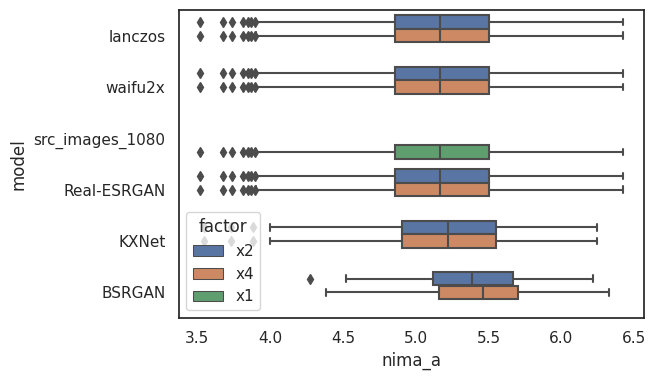

In [4]:
sns.boxplot(data = dnima, x="nima_a", hue="factor", y="model")


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='nima_q', ylabel='model'>

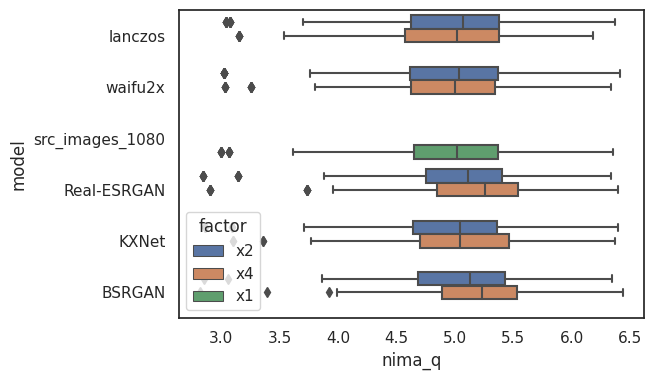

In [5]:
sns.boxplot(data = dnima, x="nima_q", hue="factor", y="model")


In [6]:
dmos = pd.read_csv("mos.csv")
dmos["image_key"] = dmos.apply(lambda x: x["upscaler"] + "_" + x["factor"] + "_" + x["base_img"] ,axis=1)
d(dmos)

dmos_nima = pd.merge(dnima[["image_key", "nima_q", "nima_a"]], dmos, left_on="image_key", right_on="image_key")
d(dmos_nima)

stimuli_file       mos  count        ci  \
0     ./stimuli/BSRGAN/x2/01_IMG_9678_BSRGANx2.png  3.500000     14  1.414293   
1     ./stimuli/BSRGAN/x2/01_IMG_9832_BSRGANx2.png  4.000000     10  0.953809   
2     ./stimuli/BSRGAN/x2/01_IMG_9943_BSRGANx2.png  4.000000     16  1.029588   
3     ./stimuli/BSRGAN/x2/01_IMG_9988_BSRGANx2.png  3.625000     16  1.020354   
4     ./stimuli/BSRGAN/x2/01_IMG_9996_BSRGANx2.png  3.000000     10  1.348890   
...                                            ...       ...    ...       ...   
1491              ./stimuli/waifu2x/x4/MG_9166.png  2.538462     13  1.269054   
1492              ./stimuli/waifu2x/x4/MG_9180.png  2.125000     16  1.020354   
1493              ./stimuli/waifu2x/x4/MG_9215.png  1.937500     16  1.063502   
1494             ./stimuli/waifu2x/x4/OUT_8905.png  1.583333     12  1.265917   
1495                ./stimuli/waifu2x/x4/blume.png  3.176471     17  1.104848   

           std factor upscaler     base_img              image_key  
0     1.224745     x2   BSRGAN  01_IMG_9678  BSRGAN_x2_01_IMG_9678  
1     0.666667     x2   BSRGAN  01_IMG_9832  BSRGAN_x2_01_IMG_9832  
2     0.966092     x2   BSRGAN  01_IMG_9943  BSRGAN_x2_01_IMG_9943  
3     0.957427     x2   BSRGAN  01_IMG_9988  BSRGAN_x2_01_IMG_9988  
4     0.942809     x2   BSRGAN  01_IMG_9996  BSRGAN_x2_01_IMG_9996  
...        ...    ...      ...          ...                    ...  
1491  1.050031     x4  waifu2x      MG_9166     waifu2x_x4_MG_9166  
1492  0.957427     x4  waifu2x      MG_9180     waifu2x_x4_MG_9180  
1493  0.997914     x4  waifu2x      MG_9215     waifu2x_x4_MG_9215  
1494  0.996205     x4  waifu2x     OUT_8905    waifu2x_x4_OUT_8905  
1495  1.074436     x4  waifu2x        blume       waifu2x_x4_blume  

[1496 rows x 9 columns]

image_key    nima_q    nima_a  \
0       lanczos_x2_IMG_9320  4.968366  4.423130   
1       lanczos_x2_IMG_9320  4.968366  4.562149   
2       lanczos_x2_IMG_9320  4.968366  4.782693   
3       lanczos_x2_IMG_9320  4.968366  4.384047   
4       lanczos_x2_IMG_9320  4.968366  4.702191   
...                     ...       ...       ...   
6963     BSRGAN_x4_IMG_4436  5.278647  5.477110   
6964     BSRGAN_x4_IMG_5572  5.530703  5.115823   
6965  BSRGAN_x4_01_IMG_9678  5.100559  5.402221   
6966     BSRGAN_x4_IMG_5334  5.280122  4.456563   
6967     BSRGAN_x4_IMG_5452  4.380781  5.929143   

                                    stimuli_file       mos  count        ci  \
0              ./stimuli/lanczos/x2/IMG_9320.png  2.727273     11  0.868877   
1              ./stimuli/lanczos/x2/IMG_9320.png  2.727273     11  0.868877   
2              ./stimuli/lanczos/x2/IMG_9320.png  2.727273     11  0.868877   
3              ./stimuli/lanczos/x2/IMG_9320.png  2.727273     11  0.868877   
4              ./stimuli/lanczos/x2/IMG_9320.png  2.727273     11  0.868877   
...                                          ...       ...    ...       ...   
6963     ./stimuli/BSRGAN/x4/IMG_4436_BSRGAN.png  3.333333     12  1.564172   
6964     ./stimuli/BSRGAN/x4/IMG_5572_BSRGAN.png  2.411765     17  1.313799   
6965  ./stimuli/BSRGAN/x4/01_IMG_9678_BSRGAN.png  3.071429     14  1.317748   
6966     ./stimuli/BSRGAN/x4/IMG_5334_BSRGAN.png  3.250000     12  1.636785   
6967     ./stimuli/BSRGAN/x4/IMG_5452_BSRGAN.png  3.214286     14  1.295316   

           std factor upscaler     base_img  
0     0.646670     x2  lanczos     IMG_9320  
1     0.646670     x2  lanczos     IMG_9320  
2     0.646670     x2  lanczos     IMG_9320  
3     0.646670     x2  lanczos     IMG_9320  
4     0.646670     x2  lanczos     IMG_9320  
...        ...    ...      ...          ...  
6963  1.230915     x4   BSRGAN     IMG_4436  
6964  1.277636     x4   BSRGAN     IMG_5572  
6965  1.141139     x4   BSRGAN  01_IMG_9678  
6966  1.288057     x4   BSRGAN     IMG_5334  
6967  1.121714     x4   BSRGAN     IMG_5452  

[6968 rows x 11 columns]

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='nima_q', ylabel='mos'>

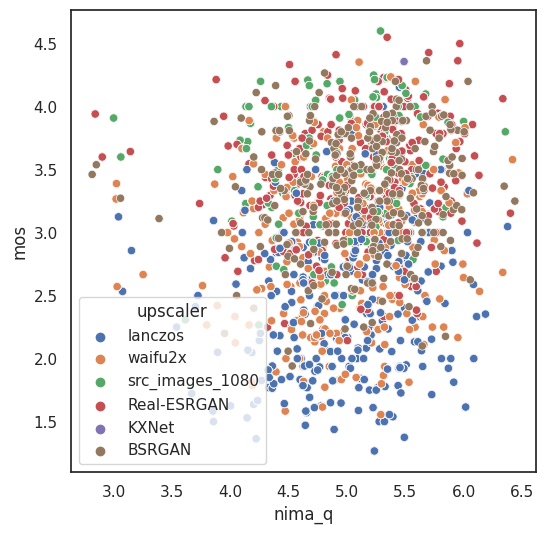

In [7]:
set_fig_size((6,6))
sns.scatterplot(x="nima_q", y="mos", hue="upscaler",  data=dmos_nima)

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='nima_a', ylabel='mos'>

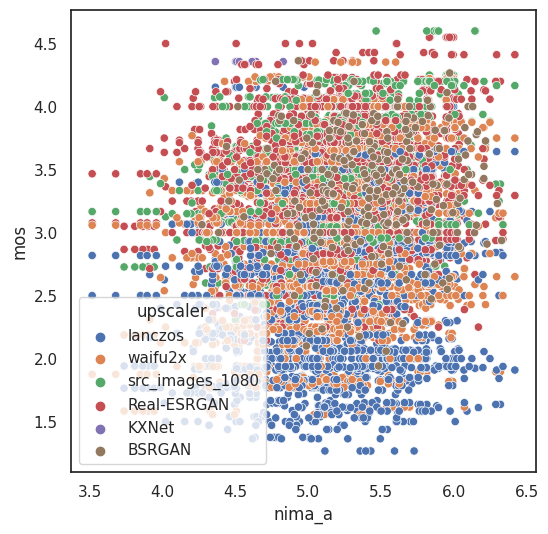

In [8]:
set_fig_size((6,6))
sns.scatterplot(x="nima_a", y="mos", hue="upscaler", data=dmos_nima)

* the problem with nima is, that it is using down scaled images as inout, thus the upscaling effects disappear

In [9]:
# NIMA CC results for appeal and quality

dnima_appeal = pd.concat(list(map(read_json, glob.glob("../upscaling_features/nima_appeal_cc/*"))))
dnima_appeal = dnima_appeal.rename(columns={"mean_score_prediction": "nima_a_cc"})

d(dnima_appeal)

dnima_quality = pd.concat(list(map(read_json, glob.glob("../upscaling_features/nima_quality_cc/*"))))
dnima_quality = dnima_quality.rename(columns={"mean_score_prediction": "nima_q_cc"})

d(dnima_quality)

dnima = pd.merge(dnima_quality, dnima_appeal[["nima_a_cc", "image_id"]], left_on="image_id", right_on="image_id")
d(dnima)
dmos_nima = pd.merge(dnima[["image_key", "nima_a_cc", "nima_q_cc"]], dmos, left_on="image_key", right_on="image_key")
d(dmos_nima)

image_id  nima_a_cc  \
0                IMG_20190531_214259013   3.877100   
1                              IMG_6426   3.651752   
2                              IMG_9401   3.891840   
3                              IMG_4884   3.967287   
4            IMG_20200928_164235267_HDR   3.337461   
..                                  ...        ...   
131                            IMG_5452   4.333149   
132                            IMG_7595   3.455280   
133                            OUT_8905   3.664834   
134                            IMG_5971   4.369016   
135  IMG_20190505_194506274_HDR-EFFECTS   4.306158   

                                base_id            model factor  \
0                IMG_20190531_214259013  src_images_1080     x1   
1                              IMG_6426  src_images_1080     x1   
2                              IMG_9401  src_images_1080     x1   
3                              IMG_4884  src_images_1080     x1   
4            IMG_20200928_164235267_HDR  src_images_1080     x1   
..                                  ...              ...    ...   
131                            IMG_5452      Real-ESRGAN     x4   
132                            IMG_7595      Real-ESRGAN     x4   
133                            OUT_8905      Real-ESRGAN     x4   
134                            IMG_5971      Real-ESRGAN     x4   
135  IMG_20190505_194506274_HDR-EFFECTS      Real-ESRGAN     x4   

                                             image_key  
0            src_images_1080_x1_IMG_20190531_214259013  
1                          src_images_1080_x1_IMG_6426  
2                          src_images_1080_x1_IMG_9401  
3                          src_images_1080_x1_IMG_4884  
4        src_images_1080_x1_IMG_20200928_164235267_HDR  
..                                                 ...  
131                            Real-ESRGAN_x4_IMG_5452  
132                            Real-ESRGAN_x4_IMG_7595  
133                            Real-ESRGAN_x4_OUT_8905  
134                            Real-ESRGAN_x4_IMG_5971  
135  Real-ESRGAN_x4_IMG_20190505_194506274_HDR-EFFECTS  

[1496 rows x 6 columns]

image_id  nima_q_cc                     base_id  \
0        IMG_20190531_214259013   4.735020      IMG_20190531_214259013   
1                      IMG_6426   4.650265                    IMG_6426   
2                      IMG_9401   4.713838                    IMG_9401   
3                      IMG_4884   3.441405                    IMG_4884   
4    IMG_20200928_164235267_HDR   4.616456  IMG_20200928_164235267_HDR   
..                          ...        ...                         ...   
131             IMG_6010_BSRGAN   4.359514                    IMG_6010   
132             IMG_7579_BSRGAN   6.058878                    IMG_7579   
133             IMG_8968_BSRGAN   5.153709                    IMG_8968   
134              MG_9163_BSRGAN   4.304587                     MG_9163   
135          01_IMG_9832_BSRGAN   4.110844                 01_IMG_9832   

           model factor                                  image_key  
0    Real-ESRGAN     x4      Real-ESRGAN_x4_IMG_20190531_214259013  
1    Real-ESRGAN     x4                    Real-ESRGAN_x4_IMG_6426  
2    Real-ESRGAN     x4                    Real-ESRGAN_x4_IMG_9401  
3    Real-ESRGAN     x4                    Real-ESRGAN_x4_IMG_4884  
4    Real-ESRGAN     x4  Real-ESRGAN_x4_IMG_20200928_164235267_HDR  
..           ...    ...                                        ...  
131       BSRGAN     x4                         BSRGAN_x4_IMG_6010  
132       BSRGAN     x4                         BSRGAN_x4_IMG_7579  
133       BSRGAN     x4                         BSRGAN_x4_IMG_8968  
134       BSRGAN     x4                          BSRGAN_x4_MG_9163  
135       BSRGAN     x4                      BSRGAN_x4_01_IMG_9832  

[1496 rows x 6 columns]

image_id  nima_q_cc                 base_id        model  \
0     IMG_20190531_214259013   4.735020  IMG_20190531_214259013  Real-ESRGAN   
1     IMG_20190531_214259013   4.735020  IMG_20190531_214259013  Real-ESRGAN   
2     IMG_20190531_214259013   4.735020  IMG_20190531_214259013  Real-ESRGAN   
3     IMG_20190531_214259013   4.735020  IMG_20190531_214259013  Real-ESRGAN   
4     IMG_20190531_214259013   4.735020  IMG_20190531_214259013  Real-ESRGAN   
...                      ...        ...                     ...          ...   
7503         IMG_6010_BSRGAN   4.359514                IMG_6010       BSRGAN   
7504         IMG_7579_BSRGAN   6.058878                IMG_7579       BSRGAN   
7505         IMG_8968_BSRGAN   5.153709                IMG_8968       BSRGAN   
7506          MG_9163_BSRGAN   4.304587                 MG_9163       BSRGAN   
7507      01_IMG_9832_BSRGAN   4.110844             01_IMG_9832       BSRGAN   

     factor                              image_key  nima_a_cc  
0        x4  Real-ESRGAN_x4_IMG_20190531_214259013   3.877100  
1        x4  Real-ESRGAN_x4_IMG_20190531_214259013   4.600472  
2        x4  Real-ESRGAN_x4_IMG_20190531_214259013   3.642807  
3        x4  Real-ESRGAN_x4_IMG_20190531_214259013   4.054700  
4        x4  Real-ESRGAN_x4_IMG_20190531_214259013   4.756305  
...     ...                                    ...        ...  
7503     x4                     BSRGAN_x4_IMG_6010   3.642938  
7504     x4                     BSRGAN_x4_IMG_7579   4.509822  
7505     x4                     BSRGAN_x4_IMG_8968   4.029035  
7506     x4                      BSRGAN_x4_MG_9163   4.073089  
7507     x4                  BSRGAN_x4_01_IMG_9832   4.777641  

[7508 rows x 7 columns]

image_key  nima_a_cc  nima_q_cc  \
0     Real-ESRGAN_x4_IMG_20190531_214259013   3.877100   4.735020   
1     Real-ESRGAN_x4_IMG_20190531_214259013   4.600472   4.735020   
2     Real-ESRGAN_x4_IMG_20190531_214259013   3.642807   4.735020   
3     Real-ESRGAN_x4_IMG_20190531_214259013   4.054700   4.735020   
4     Real-ESRGAN_x4_IMG_20190531_214259013   4.756305   4.735020   
...                                     ...        ...        ...   
6963                     BSRGAN_x4_IMG_6010   3.642938   4.359514   
6964                     BSRGAN_x4_IMG_7579   4.509822   6.058878   
6965                     BSRGAN_x4_IMG_8968   4.029035   5.153709   
6966                      BSRGAN_x4_MG_9163   4.073089   4.304587   
6967                  BSRGAN_x4_01_IMG_9832   4.777641   4.110844   

                                           stimuli_file       mos  count  \
0     ./stimuli/Real-ESRGAN/x4/IMG_20190531_21425901...  3.375000     16   
1     ./stimuli/Real-ESRGAN/x4/IMG_20190531_21425901...  3.375000     16   
2     ./stimuli/Real-ESRGAN/x4/IMG_20190531_21425901...  3.375000     16   
3     ./stimuli/Real-ESRGAN/x4/IMG_20190531_21425901...  3.375000     16   
4     ./stimuli/Real-ESRGAN/x4/IMG_20190531_21425901...  3.375000     16   
...                                                 ...       ...    ...   
6963            ./stimuli/BSRGAN/x4/IMG_6010_BSRGAN.png  3.750000     12   
6964            ./stimuli/BSRGAN/x4/IMG_7579_BSRGAN.png  3.181818     11   
6965            ./stimuli/BSRGAN/x4/IMG_8968_BSRGAN.png  3.200000     15   
6966             ./stimuli/BSRGAN/x4/MG_9163_BSRGAN.png  3.142857     14   
6967         ./stimuli/BSRGAN/x4/01_IMG_9832_BSRGAN.png  3.333333     15   

            ci       std factor     upscaler                base_img  
0     1.020354  0.957427     x4  Real-ESRGAN  IMG_20190531_214259013  
1     1.020354  0.957427     x4  Real-ESRGAN  IMG_20190531_214259013  
2     1.020354  0.957427     x4  Real-ESRGAN  IMG_20190531_214259013  
3     1.020354  0.957427     x4  Real-ESRGAN  IMG_20190531_214259013  
4     1.020354  0.957427     x4  Real-ESRGAN  IMG_20190531_214259013  
...        ...       ...    ...          ...                     ...  
6963  1.100493  0.866025     x4       BSRGAN                IMG_6010  
6964  1.318963  0.981650     x4       BSRGAN                IMG_7579  
6965  0.954599  0.861892     x4       BSRGAN                IMG_8968  
6966  1.186066  1.027105     x4       BSRGAN                 MG_9163  
6967  1.159105  1.046536     x4       BSRGAN             01_IMG_9832  

[6968 rows x 11 columns]

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='nima_a_cc', ylabel='mos'>

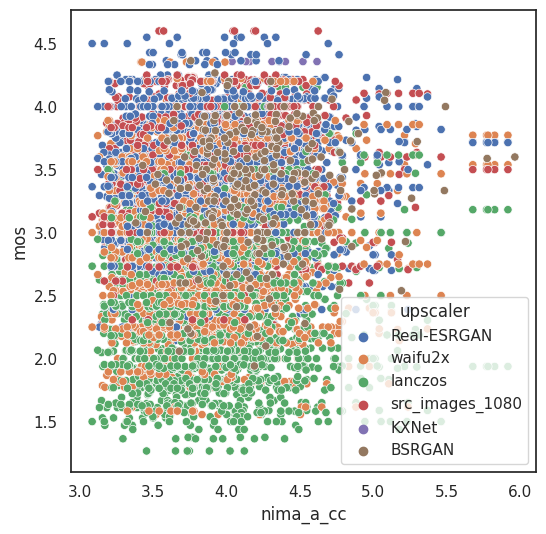

In [10]:
set_fig_size((6,6))
sns.scatterplot(x="nima_a_cc", y="mos", hue="upscaler", data=dmos_nima)

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

{'cmp vs mos': 'nima_q_cc', 'p': 0.433, 'k': 0.281, 's': 0.408}


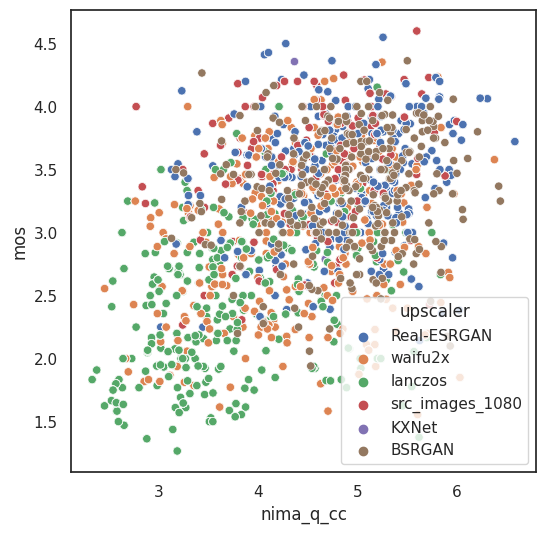

In [11]:
set_fig_size((6,6))
sns.scatterplot(x="nima_q_cc", y="mos", hue="upscaler", data=dmos_nima)


print(
    {
            "cmp vs mos": "nima_q_cc",
            "p": dmos_nima[["nima_q_cc", "mos"]].corr(method="pearson")["mos"][0].round(3),
            "k": dmos_nima[["nima_q_cc", "mos"]].corr(method="kendall")["mos"][0].round(3),
            "s": dmos_nima[["nima_q_cc", "mos"]].corr(method="spearman")["mos"][0].round(3)
    }
)

# other features

In [12]:
df = pd.read_json("../upscaling_features/upscaling_features.json")
df["base_img"] = df["image"].apply(extract_baseimg)
df["model"] = df["image"].apply(lambda x: x.split("/")[2])
df["factor"] = df["image"].apply(lambda x: x.split("/")[3])
df["image_key"] = df["model"] + "_" + df["factor"] + "_" + df["base_img"]
d(df)

image       niqe  \
0     ../upscaling/BSRGAN/x2/01_IMG_9678_BSRGANx2.png  19.224281   
1     ../upscaling/BSRGAN/x2/01_IMG_9832_BSRGANx2.png  18.923172   
2     ../upscaling/BSRGAN/x2/01_IMG_9943_BSRGANx2.png  19.977972   
3     ../upscaling/BSRGAN/x2/01_IMG_9988_BSRGANx2.png  19.198479   
4     ../upscaling/BSRGAN/x2/01_IMG_9996_BSRGANx2.png  20.452810   
...                                               ...        ...   
1494              ../upscaling/waifu2x/x4/MG_9163.png  20.599138   
1495              ../upscaling/waifu2x/x4/MG_9166.png  20.940027   
1496              ../upscaling/waifu2x/x4/MG_9180.png  20.374275   
1497              ../upscaling/waifu2x/x4/MG_9215.png  19.994467   
1498             ../upscaling/waifu2x/x4/OUT_8905.png  21.367598   

      color_fulness      tone          blur  saturation           fft  \
0        157.095114  0.532731   7936.308169   23.451031  55870.579287   
1        165.313510  0.709670  18259.735131   10.021828  61213.410983   
2        150.339971  0.566277  55636.827228   20.553304  66728.322622   
3        154.659404  0.584836  53963.734227   26.908342  67003.091838   
4        167.497008  0.605745  10754.936760   12.073878  59144.942618   
...             ...       ...           ...         ...           ...   
1494      91.918512  0.753470  16543.188013   33.273214  56511.435881   
1495     135.849652  0.787335  17329.046158   21.326660  56801.086374   
1496     166.725755  0.866407  25635.950873   12.757780  56612.745100   
1497      83.417251  0.728198   1666.347081   18.156889  52733.063418   
1498     154.844077  0.696946   2220.514977   22.076907  60176.850050   

            si   contrast     noise   dominant_color      cpbd  blur_stength  \
0     0.188418  86.147477  0.855981  [186, 198, 214]  0.951389      0.269635   
1     0.239505  84.279093  0.825093   [98, 102, 110]  0.841772      0.380026   
2     0.290963  83.882262  0.742925  [172, 180, 188]  0.884492      0.341721   
3     0.307366  84.439819  0.763912  [166, 180, 193]  0.930000      0.300796   
4     0.169788  83.352988  0.592922  [125, 128, 137]  0.935961      0.416488   
...        ...        ...       ...              ...       ...           ...   
1494  0.174189  86.070152  0.191384        [9, 9, 9]  0.207508      0.547669   
1495  0.190531  78.025233  0.228330        [6, 6, 6]  0.423347      0.487346   
1496  0.235795  91.634470  0.277988  [178, 180, 176]  0.562112      0.443817   
1497  0.071777  84.393887  0.152220     [13, 12, 12]  0.428571      0.646708   
1498  0.080705  89.823597  0.098721     [11, 14, 13]  0.266010      0.592046   

         base_img    model factor              image_key  
0     01_IMG_9678   BSRGAN     x2  BSRGAN_x2_01_IMG_9678  
1     01_IMG_9832   BSRGAN     x2  BSRGAN_x2_01_IMG_9832  
2     01_IMG_9943   BSRGAN     x2  BSRGAN_x2_01_IMG_9943  
3     01_IMG_9988   BSRGAN     x2  BSRGAN_x2_01_IMG_9988  
4     01_IMG_9996   BSRGAN     x2  BSRGAN_x2_01_IMG_9996  
...           ...      ...    ...                    ...  
1494      MG_9163  waifu2x     x4     waifu2x_x4_MG_9163  
1495      MG_9166  waifu2x     x4     waifu2x_x4_MG_9166  
1496      MG_9180  waifu2x     x4     waifu2x_x4_MG_9180  
1497      MG_9215  waifu2x     x4     waifu2x_x4_MG_9215  
1498     OUT_8905  waifu2x     x4    waifu2x_x4_OUT_8905  

[1499 rows x 17 columns]

In [13]:
dmos_feat = pd.merge(
    df[df.columns.difference(["image", "model", "factor", "base_img"])], 
    dmos, 
    left_on="image_key", 
    right_on="image_key"
)

d(dmos_feat)

blur  blur_stength  color_fulness   contrast      cpbd  \
0      7936.308169      0.269635     157.095114  86.147477  0.951389   
1     18259.735131      0.380026     165.313510  84.279093  0.841772   
2     55636.827228      0.341721     150.339971  83.882262  0.884492   
3     53963.734227      0.300796     154.659404  84.439819  0.930000   
4     10754.936760      0.416488     167.497008  83.352988  0.935961   
...            ...           ...            ...        ...       ...   
1491  16543.188013      0.547669      91.918512  86.070152  0.207508   
1492  17329.046158      0.487346     135.849652  78.025233  0.423347   
1493  25635.950873      0.443817     166.725755  91.634470  0.562112   
1494   1666.347081      0.646708      83.417251  84.393887  0.428571   
1495   2220.514977      0.592046     154.844077  89.823597  0.266010   

       dominant_color           fft              image_key       niqe  \
0     [186, 198, 214]  55870.579287  BSRGAN_x2_01_IMG_9678  19.224281   
1      [98, 102, 110]  61213.410983  BSRGAN_x2_01_IMG_9832  18.923172   
2     [172, 180, 188]  66728.322622  BSRGAN_x2_01_IMG_9943  19.977972   
3     [166, 180, 193]  67003.091838  BSRGAN_x2_01_IMG_9988  19.198479   
4     [125, 128, 137]  59144.942618  BSRGAN_x2_01_IMG_9996  20.452810   
...               ...           ...                    ...        ...   
1491        [9, 9, 9]  56511.435881     waifu2x_x4_MG_9163  20.599138   
1492        [6, 6, 6]  56801.086374     waifu2x_x4_MG_9166  20.940027   
1493  [178, 180, 176]  56612.745100     waifu2x_x4_MG_9180  20.374275   
1494     [13, 12, 12]  52733.063418     waifu2x_x4_MG_9215  19.994467   
1495     [11, 14, 13]  60176.850050    waifu2x_x4_OUT_8905  21.367598   

         noise  ...        si      tone  \
0     0.855981  ...  0.188418  0.532731   
1     0.825093  ...  0.239505  0.709670   
2     0.742925  ...  0.290963  0.566277   
3     0.763912  ...  0.307366  0.584836   
4     0.592922  ...  0.169788  0.605745   
...        ...  ...       ...       ...   
1491  0.191384  ...  0.174189  0.753470   
1492  0.228330  ...  0.190531  0.787335   
1493  0.277988  ...  0.235795  0.866407   
1494  0.152220  ...  0.071777  0.728198   
1495  0.098721  ...  0.080705  0.696946   

                                      stimuli_file       mos  count        ci  \
0     ./stimuli/BSRGAN/x2/01_IMG_9678_BSRGANx2.png  3.500000     14  1.414293   
1     ./stimuli/BSRGAN/x2/01_IMG_9832_BSRGANx2.png  4.000000     10  0.953809   
2     ./stimuli/BSRGAN/x2/01_IMG_9943_BSRGANx2.png  4.000000     16  1.029588   
3     ./stimuli/BSRGAN/x2/01_IMG_9988_BSRGANx2.png  3.625000     16  1.020354   
4     ./stimuli/BSRGAN/x2/01_IMG_9996_BSRGANx2.png  3.000000     10  1.348890   
...                                            ...       ...    ...       ...   
1491              ./stimuli/waifu2x/x4/MG_9163.png  2.250000     16  1.065725   
1492              ./stimuli/waifu2x/x4/MG_9166.png  2.538462     13  1.269054   
1493              ./stimuli/waifu2x/x4/MG_9180.png  2.125000     16  1.020354   
1494              ./stimuli/waifu2x/x4/MG_9215.png  1.937500     16  1.063502   
1495             ./stimuli/waifu2x/x4/OUT_8905.png  1.583333     12  1.265917   

           std  factor upscaler     base_img  
0     1.224745      x2   BSRGAN  01_IMG_9678  
1     0.666667      x2   BSRGAN  01_IMG_9832  
2     0.966092      x2   BSRGAN  01_IMG_9943  
3     0.957427      x2   BSRGAN  01_IMG_9988  
4     0.942809      x2   BSRGAN  01_IMG_9996  
...        ...     ...      ...          ...  
1491  1.000000      x4  waifu2x      MG_9163  
1492  1.050031      x4  waifu2x      MG_9166  
1493  0.957427      x4  waifu2x      MG_9180  
1494  0.997914      x4  waifu2x      MG_9215  
1495  0.996205      x4  waifu2x     OUT_8905  

[1496 rows x 21 columns]

In [14]:
features = list(dmos_feat.columns.difference(
        ["dominant_color", "stimuli_file", "base_img", "model", 
         "image_key", "upscaler", "mos", "factor", "ci", "count", "std"]
    )
)
print(features)

['blur', 'blur_stength', 'color_fulness', 'contrast', 'cpbd', 'fft', 'niqe', 'noise', 'saturation', 'si', 'tone']


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


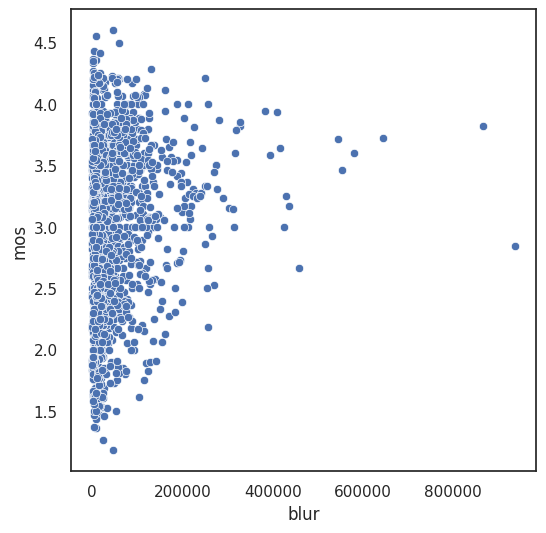

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

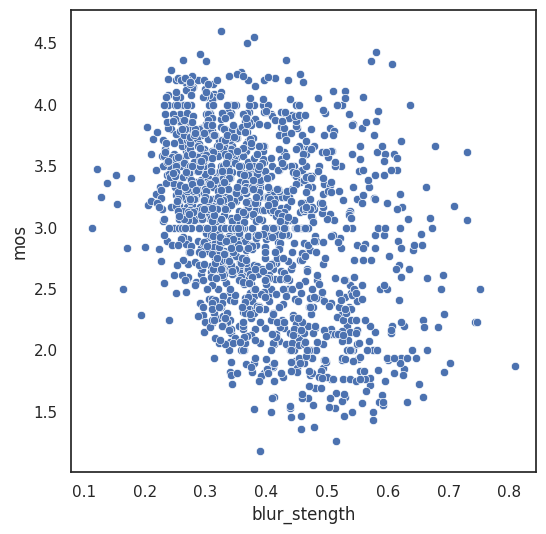

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

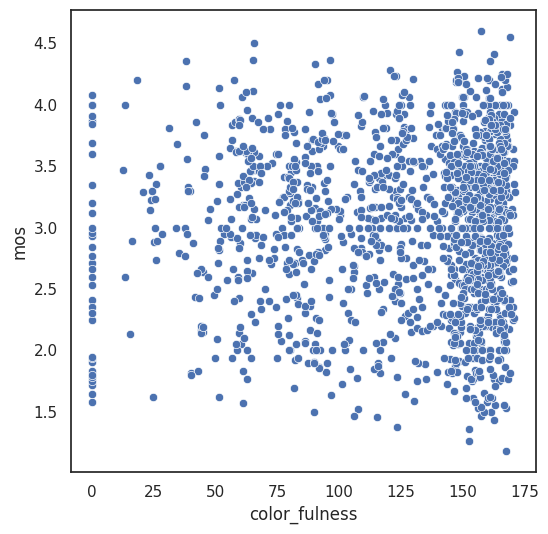

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

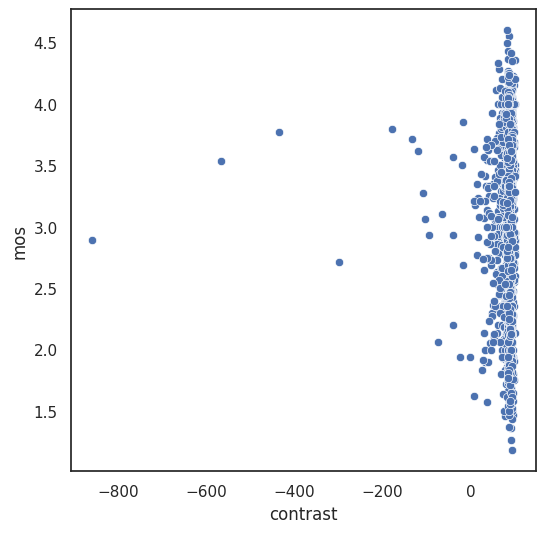

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

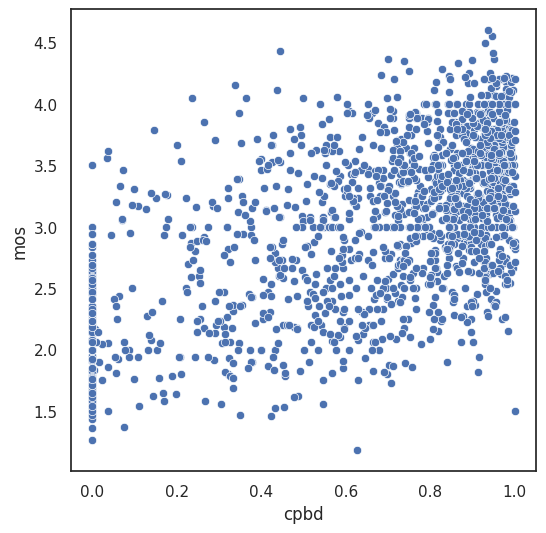

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

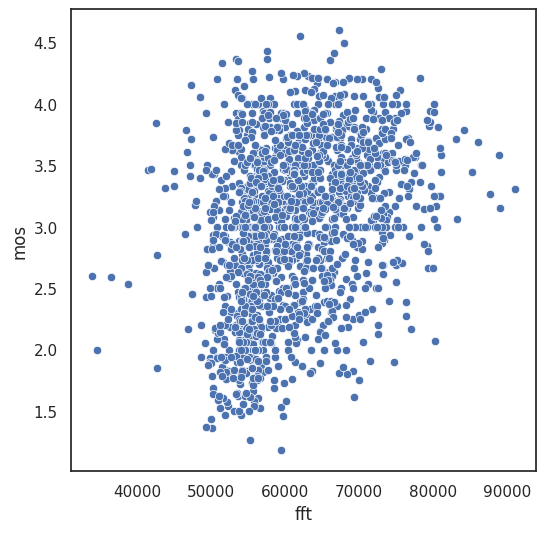

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

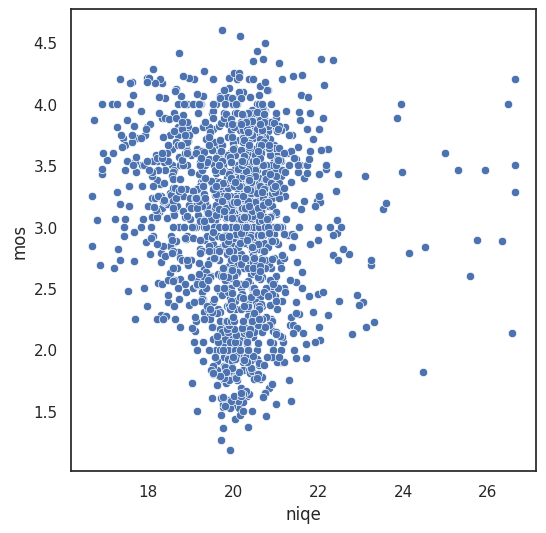

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

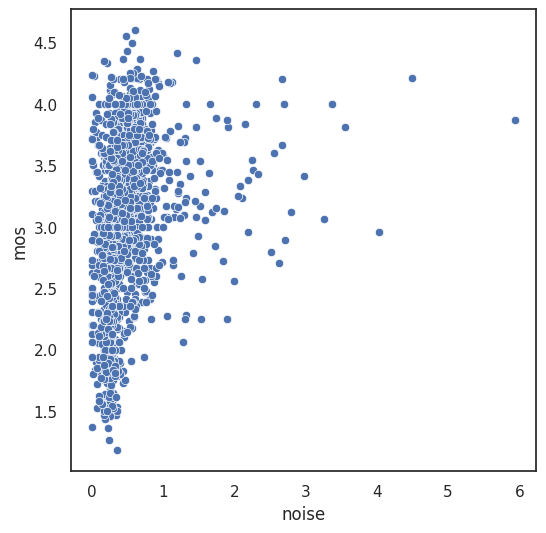

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

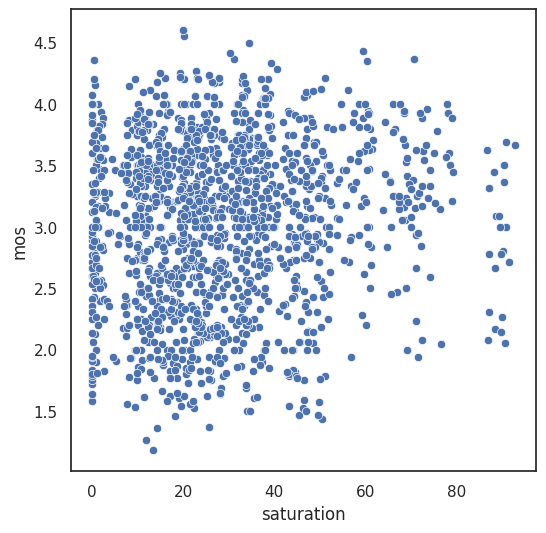

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

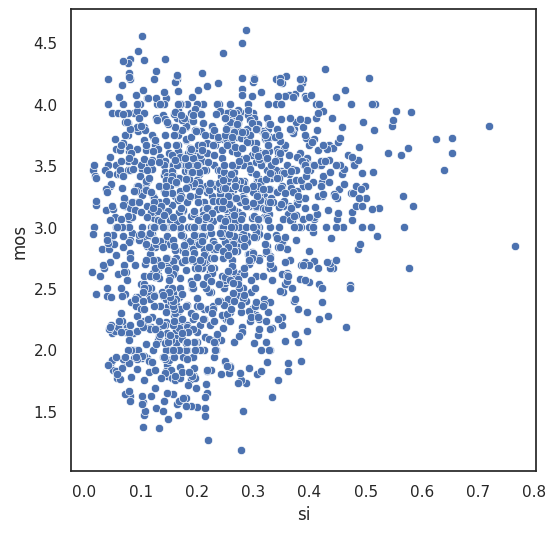

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

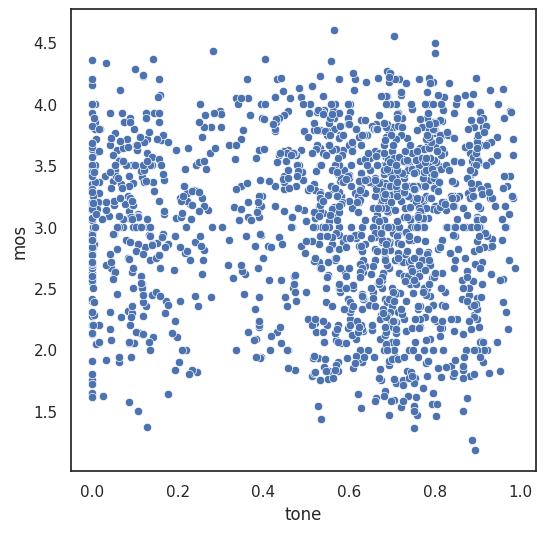

/tmp/ipykernel_3688489/2570869625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2570869625.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos

In [15]:
metrics = []
for f in features:
    sns.scatterplot(x=f, y="mos", data=dmos_feat)
    plt.show()
    metrics.append(
        {
            "cmp vs mos": f,
            "p": dmos_feat[[f, "mos"]].corr(method="pearson")["mos"][0],
            "k": dmos_feat[[f, "mos"]].corr(method="kendall")["mos"][0],
            "s": dmos_feat[[f, "mos"]].corr(method="spearman")["mos"][0]
        }
    )
    


In [16]:
# train a combined model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

X = dmos_feat[features].values
Y = dmos_feat["mos"].values

model = RandomForestRegressor(n_jobs=-1, criterion="squared_error", random_state=42)

pred = cross_val_predict(model, X, Y, cv=10)

print(pred)

[3.59191872 3.08514139 3.21985356 ... 2.58381317 2.35287893 2.40975521]



P: 0.669
K: 0.45
S: 0.631



image_key       mos      pred
0     BSRGAN_x2_01_IMG_9678  3.500000  3.591919
1     BSRGAN_x2_01_IMG_9832  4.000000  3.085141
2     BSRGAN_x2_01_IMG_9943  4.000000  3.219854
3     BSRGAN_x2_01_IMG_9988  3.625000  3.246636
4     BSRGAN_x2_01_IMG_9996  3.000000  3.528737
...                     ...       ...       ...
1491     waifu2x_x4_MG_9163  2.250000  2.112906
1492     waifu2x_x4_MG_9166  2.538462  2.492782
1493     waifu2x_x4_MG_9180  2.125000  2.583813
1494     waifu2x_x4_MG_9215  1.937500  2.352879
1495    waifu2x_x4_OUT_8905  1.583333  2.409755

[1496 rows x 3 columns]

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


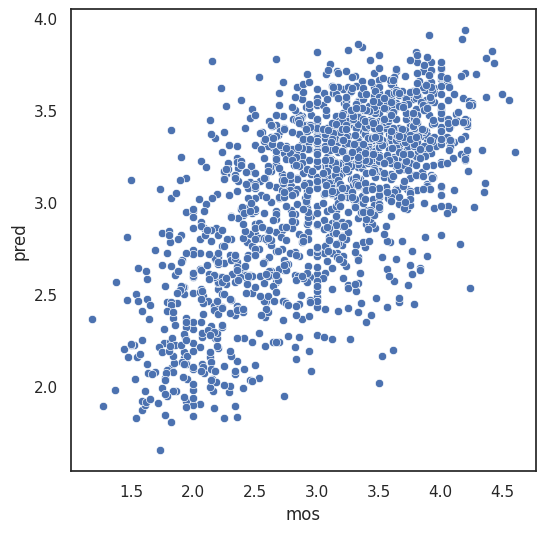

In [17]:
dval = dmos_feat[["image_key", "mos"]].copy()
dval["pred"] = pred

p =  dval[["pred", "mos"]].corr().values[0,1]
s = dval[["pred", "mos"]].corr(method="spearman").values[0,1]
k = dval[["pred", "mos"]].corr(method="kendall").values[0,1]

print(f"""
P: {p.round(3)}
K: {k.round(3)}
S: {s.round(3)}
""")
d(dval)
sns.scatterplot(data=dval, x="mos", y="pred")
metrics.append({
    "cmp vs mos": "combined",
    "p": p,
    "s": s,
    "k": k    
})

In [18]:
dmetrics = pd.DataFrame(metrics).sort_values(by="p", ascending=False)
d(dmetrics)

print(dmetrics.round(3).to_latex(index=False))

cmp vs mos         p         k         s
11       combined  0.668585  0.450163  0.631047
4            cpbd  0.571781  0.363258  0.522174
5             fft  0.331066  0.237770  0.349795
7           noise  0.298678  0.302446  0.446594
9              si  0.212692  0.134837  0.200159
0            blur  0.152106  0.109896  0.163813
8      saturation  0.093398  0.057431  0.086659
2   color_fulness  0.024466  0.018962  0.028322
3        contrast -0.013298 -0.005167 -0.007968
10           tone -0.039183 -0.020333 -0.030965
6            niqe -0.087582 -0.040492 -0.061129
1    blur_stength -0.377878 -0.257239 -0.375492

\begin{tabular}{lrrr}
\toprule
cmp vs mos & p & k & s \\
\midrule
combined & 0.669000 & 0.450000 & 0.631000 \\
cpbd & 0.572000 & 0.363000 & 0.522000 \\
fft & 0.331000 & 0.238000 & 0.350000 \\
noise & 0.299000 & 0.302000 & 0.447000 \\
si & 0.213000 & 0.135000 & 0.200000 \\
blur & 0.152000 & 0.110000 & 0.164000 \\
saturation & 0.093000 & 0.057000 & 0.087000 \\
color_fulness & 0.024000 & 0.019000 & 0.028000 \\
contrast & -0.013000 & -0.005000 & -0.008000 \\
tone & -0.039000 & -0.020000 & -0.031000 \\
niqe & -0.088000 & -0.040000 & -0.061000 \\
blur_stength & -0.378000 & -0.257000 & -0.375000 \\
\bottomrule
\end{tabular}



# use /check iqa metrics

In [22]:
diqa = pd.read_csv("../upscaling_features/iqa_models/iqa.csv")
diqa["base_img"] = diqa["img_id"].apply(extract_baseimg)
diqa["factor"] = diqa["model"].apply(lambda x: x.split("_")[-1])
diqa["model"] = diqa["model"].apply(lambda x: "_".join(x.split("_")[0:-1]))

diqa["image_key"] = diqa["model"] + "_" + diqa["factor"] + "_" + diqa["base_img"]

dmos_iqa = pd.merge(
    dmos, 
    diqa[diqa.columns.difference(["factor", "model", "base_img", "img_id"])], 
    left_on="image_key", 
    right_on="image_key"
)
d(dmos_iqa)

stimuli_file       mos  count        ci  \
0     ./stimuli/BSRGAN/x2/01_IMG_9678_BSRGANx2.png  3.500000     14  1.414293   
1     ./stimuli/BSRGAN/x2/01_IMG_9678_BSRGANx2.png  3.500000     14  1.414293   
2     ./stimuli/BSRGAN/x2/01_IMG_9678_BSRGANx2.png  3.500000     14  1.414293   
3     ./stimuli/BSRGAN/x2/01_IMG_9678_BSRGANx2.png  3.500000     14  1.414293   
4     ./stimuli/BSRGAN/x2/01_IMG_9678_BSRGANx2.png  3.500000     14  1.414293   
...                                            ...       ...    ...       ...   
9817                ./stimuli/waifu2x/x4/blume.png  3.176471     17  1.104848   
9818                ./stimuli/waifu2x/x4/blume.png  3.176471     17  1.104848   
9819                ./stimuli/waifu2x/x4/blume.png  3.176471     17  1.104848   
9820                ./stimuli/waifu2x/x4/blume.png  3.176471     17  1.104848   
9821                ./stimuli/waifu2x/x4/blume.png  3.176471     17  1.104848   

           std factor upscaler     base_img              image_key    metric  \
0     1.224745     x2   BSRGAN  01_IMG_9678  BSRGAN_x2_01_IMG_9678     MUSIQ   
1     1.224745     x2   BSRGAN  01_IMG_9678  BSRGAN_x2_01_IMG_9678      NIQE   
2     1.224745     x2   BSRGAN  01_IMG_9678  BSRGAN_x2_01_IMG_9678    CNNIQA   
3     1.224745     x2   BSRGAN  01_IMG_9678  BSRGAN_x2_01_IMG_9678  HYPERIQA   
4     1.224745     x2   BSRGAN  01_IMG_9678  BSRGAN_x2_01_IMG_9678    MANIQA   
...        ...    ...      ...          ...                    ...       ...   
9817  1.074436     x4  waifu2x        blume       waifu2x_x4_blume     MUSIQ   
9818  1.074436     x4  waifu2x        blume       waifu2x_x4_blume    CNNIQA   
9819  1.074436     x4  waifu2x        blume       waifu2x_x4_blume      NIQE   
9820  1.074436     x4  waifu2x        blume       waifu2x_x4_blume   paq2piq   
9821  1.074436     x4  waifu2x        blume       waifu2x_x4_blume    ILNIQE   

      quality_score  
0         63.181232  
1          4.310765  
2          0.741602  
3          0.595141  
4          0.568067  
...             ...  
9817      50.920319  
9818      -2.551580  
9819       7.774948  
9820      64.360878  
9821      39.226234  

[9822 rows x 11 columns]

CNNIQA


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


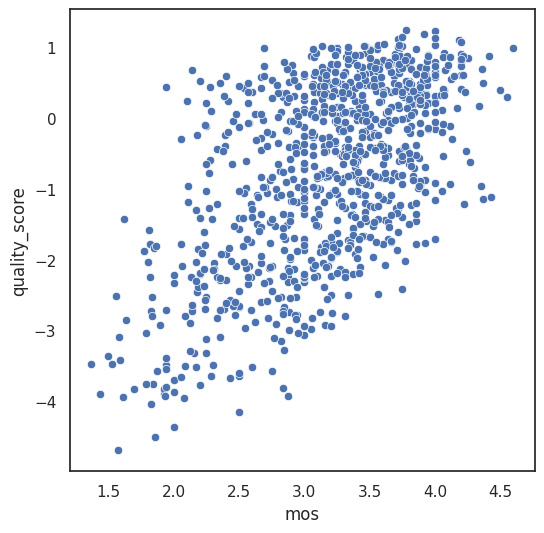

/tmp/ipykernel_3688489/1808461919.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": g[["quality_score", "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": g[["quality_score", "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": g[["quality_score", "mos"]].corr(met

DBCNN


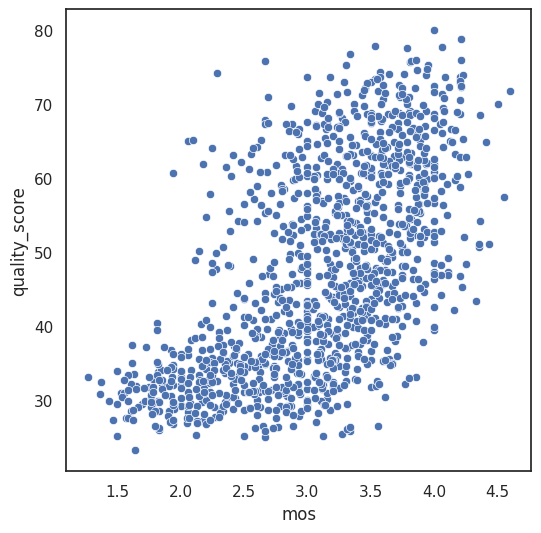

/tmp/ipykernel_3688489/1808461919.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": g[["quality_score", "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": g[["quality_score", "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": g[["quality_score", "mos"]].corr(met

HYPERIQA


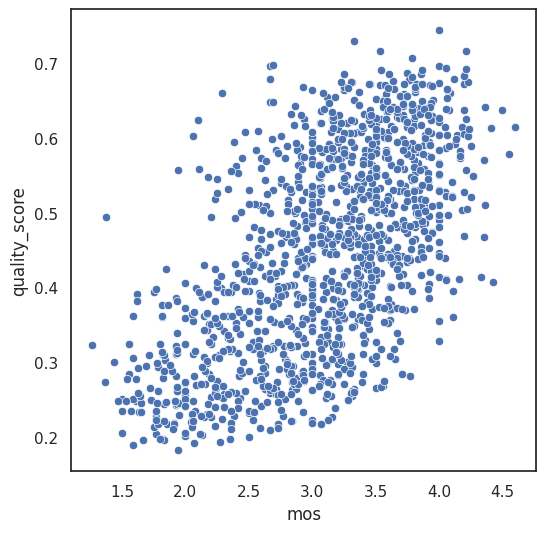

/tmp/ipykernel_3688489/1808461919.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": g[["quality_score", "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": g[["quality_score", "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": g[["quality_score", "mos"]].corr(met

ILNIQE


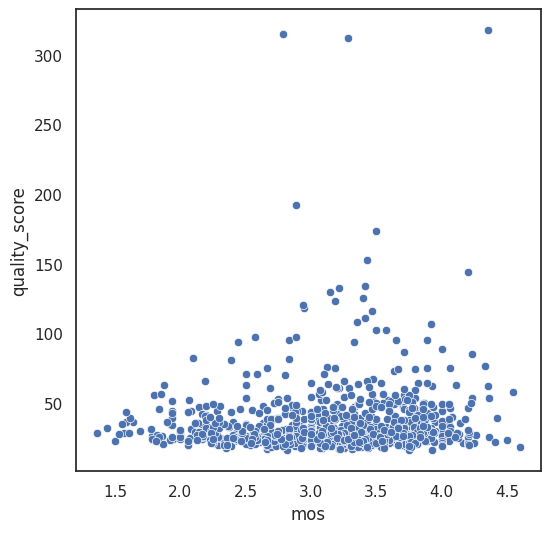

/tmp/ipykernel_3688489/1808461919.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": g[["quality_score", "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": g[["quality_score", "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": g[["quality_score", "mos"]].corr(met

MANIQA


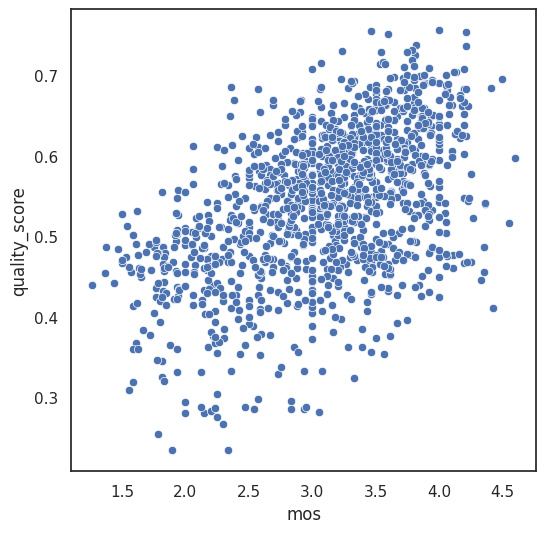

/tmp/ipykernel_3688489/1808461919.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": g[["quality_score", "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": g[["quality_score", "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": g[["quality_score", "mos"]].corr(met

MUSIQ


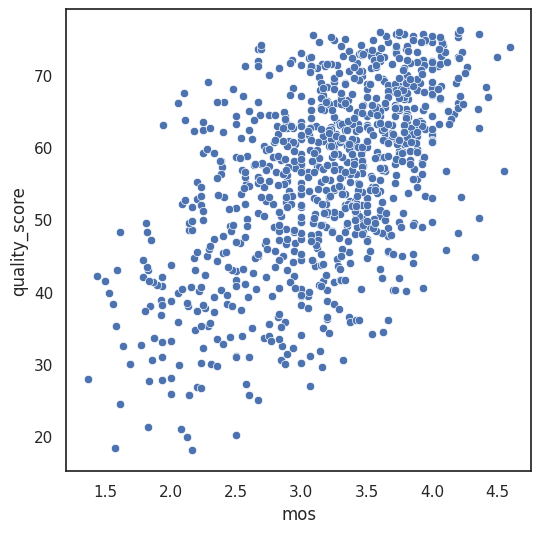

/tmp/ipykernel_3688489/1808461919.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": g[["quality_score", "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": g[["quality_score", "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": g[["quality_score", "mos"]].corr(met

paq2piq


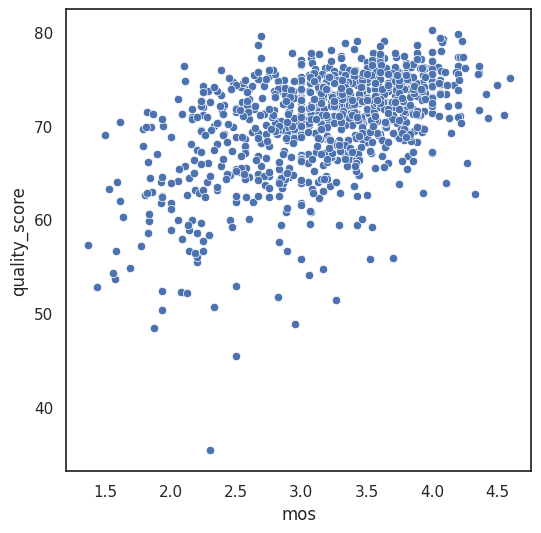

/tmp/ipykernel_3688489/1808461919.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": g[["quality_score", "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": g[["quality_score", "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/1808461919.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": g[["quality_score", "mos"]].corr(met

In [23]:
qmetrics = []
    
for i, g in dmos_iqa.groupby(by="metric"):
    if i in ["BRISQUE", "NIQE"]:
        continue
    print(i)
    sns.scatterplot(x="mos", y="quality_score", data=g)
    plt.show()
    qmetrics.append(
        {
            "cmp vs mos": i,
            "p": g[["quality_score", "mos"]].corr(method="pearson")["mos"][0],
            "k": g[["quality_score", "mos"]].corr(method="kendall")["mos"][0],
            "s": g[["quality_score", "mos"]].corr(method="spearman")["mos"][0]
        }
    )
    

In [ ]:
# a rf model has been skipped because it showed "NaNs" in X

In [24]:
dqmetrics = pd.DataFrame(qmetrics).sort_values(by="p", ascending=False)
d(dqmetrics)

print(dqmetrics.round(3).to_latex(index=False))

cmp vs mos         p         k         s
1      DBCNN  0.605430  0.436101  0.617849
2   HYPERIQA  0.600556  0.413938  0.591645
0     CNNIQA  0.591916  0.375725  0.536008
5      MUSIQ  0.555480  0.364615  0.521824
4     MANIQA  0.504809  0.344867  0.492796
6    paq2piq  0.491767  0.310592  0.448251
3     ILNIQE  0.061549  0.029270  0.043830

\begin{tabular}{lrrr}
\toprule
cmp vs mos & p & k & s \\
\midrule
DBCNN & 0.605000 & 0.436000 & 0.618000 \\
HYPERIQA & 0.601000 & 0.414000 & 0.592000 \\
CNNIQA & 0.592000 & 0.376000 & 0.536000 \\
MUSIQ & 0.555000 & 0.365000 & 0.522000 \\
MANIQA & 0.505000 & 0.345000 & 0.493000 \\
paq2piq & 0.492000 & 0.311000 & 0.448000 \\
ILNIQE & 0.062000 & 0.029000 & 0.044000 \\
\bottomrule
\end{tabular}



# checkout other metrics (e.g. full ref)

In [25]:
dim = pd.read_csv("../upscaling_features/image_metrics.csv")
dim["base_id"] = dim["dis_img"].apply(extract_baseimg)
dim["model"] = dim["dis_img"].apply(lambda x: x.split("/")[2])
dim["factor"] = dim["dis_img"].apply(lambda x: x.split("/")[3])
dim["image_key"] = dim["model"] + "_" + dim["factor"] + "_"  + dim["base_id"] 

dim_mos = pd.merge(dim, dmos[dmos.columns.difference(["upscaler", "factor", "base_id", "stimuli_file"])], left_on="image_key", right_on="image_key")
d(dim_mos)

dis_img  \
0     ../upscaling/BSRGAN/x2/01_IMG_9678_BSRGANx2.png   
1     ../upscaling/BSRGAN/x2/01_IMG_9832_BSRGANx2.png   
2     ../upscaling/BSRGAN/x2/01_IMG_9943_BSRGANx2.png   
3     ../upscaling/BSRGAN/x2/01_IMG_9988_BSRGANx2.png   
4     ../upscaling/BSRGAN/x2/01_IMG_9996_BSRGANx2.png   
...                                               ...   
1355              ../upscaling/waifu2x/x4/MG_9166.png   
1356              ../upscaling/waifu2x/x4/MG_9180.png   
1357              ../upscaling/waifu2x/x4/MG_9215.png   
1358             ../upscaling/waifu2x/x4/OUT_8905.png   
1359                ../upscaling/waifu2x/x4/blume.png   

                                              ref_img  brisque_index  \
0     ../upscaling/src_images_1080/x1/01_IMG_9678.png      13.717468   
1     ../upscaling/src_images_1080/x1/01_IMG_9832.png       7.750183   
2     ../upscaling/src_images_1080/x1/01_IMG_9943.png      20.845398   
3     ../upscaling/src_images_1080/x1/01_IMG_9988.png      24.575378   
4     ../upscaling/src_images_1080/x1/01_IMG_9996.png      24.706238   
...                                               ...            ...   
1355      ../upscaling/src_images_1080/x1/MG_9166.png      52.875183   
1356      ../upscaling/src_images_1080/x1/MG_9180.png      48.440125   
1357      ../upscaling/src_images_1080/x1/MG_9215.png      61.799011   
1358     ../upscaling/src_images_1080/x1/OUT_8905.png      62.030457   
1359        ../upscaling/src_images_1080/x1/blume.png      65.857605   

      brisque_loss  content_loss  dists_loss  dss_index  fsim_index  \
0        13.717468    374.084839    0.078969   0.922809    0.990297   
1         7.750183    385.905334    0.076182   0.874013    0.991456   
2        20.845398    501.307800    0.050843   0.943070    0.994138   
3        24.575378    579.406006    0.062123   0.951684    0.993258   
4        24.706238    243.975952    0.056921   0.962731    0.995689   
...            ...           ...         ...        ...         ...   
1355     52.875183   1281.316650    0.112691   0.732947    0.972954   
1356     48.440125   1171.318848    0.090516   0.787092    0.975998   
1357     61.799011    503.278870    0.147398   0.803829    0.973296   
1358     62.030457    482.059509    0.152253   0.787836    0.982044   
1359     65.857605    353.375275    0.048008   0.962578    0.998456   

      gmsd_index  haarpsi_index  ...  srsim_index      base_id    model  \
0       0.040030       0.855934  ...     0.993811  01_IMG_9678   BSRGAN   
1       0.055055       0.846105  ...     0.996027  01_IMG_9832   BSRGAN   
2       0.029506       0.874980  ...     0.997216  01_IMG_9943   BSRGAN   
3       0.031851       0.854348  ...     0.996724  01_IMG_9988   BSRGAN   
4       0.020884       0.916624  ...     0.998325  01_IMG_9996   BSRGAN   
...          ...            ...  ...          ...          ...      ...   
1355    0.113073       0.682812  ...     0.987009      MG_9166  waifu2x   
1356    0.106425       0.722257  ...     0.989600      MG_9180  waifu2x   
1357    0.093116       0.718991  ...     0.988510      MG_9215  waifu2x   
1358    0.077385       0.789416  ...     0.992679     OUT_8905  waifu2x   
1359    0.016395       0.949375  ...     0.998999        blume  waifu2x   

      factor              image_key     base_img        ci  count       mos  \
0         x2  BSRGAN_x2_01_IMG_9678  01_IMG_9678  1.414293     14  3.500000   
1         x2  BSRGAN_x2_01_IMG_9832  01_IMG_9832  0.953809     10  4.000000   
2         x2  BSRGAN_x2_01_IMG_9943  01_IMG_9943  1.029588     16  4.000000   
3         x2  BSRGAN_x2_01_IMG_9988  01_IMG_9988  1.020354     16  3.625000   
4         x2  BSRGAN_x2_01_IMG_9996  01_IMG_9996  1.348890     10  3.000000   
...      ...                    ...          ...       ...    ...       ...   
1355      x4     waifu2x_x4_MG_9166      MG_9166  1.269054     13  2.538462   
1356      x4     waifu2x_x4_MG_9180      MG_9180  1.020354     16  2.125000   
1357      x4     waifu2x_x4_MG_

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


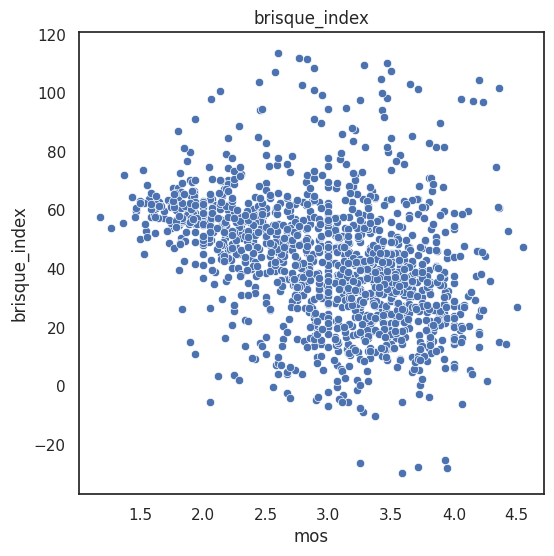

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

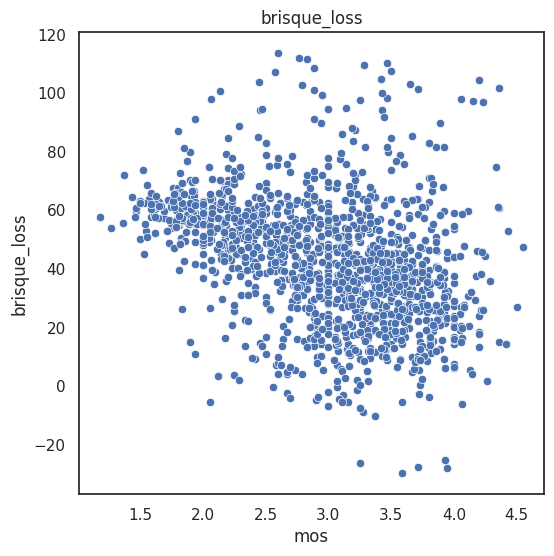

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

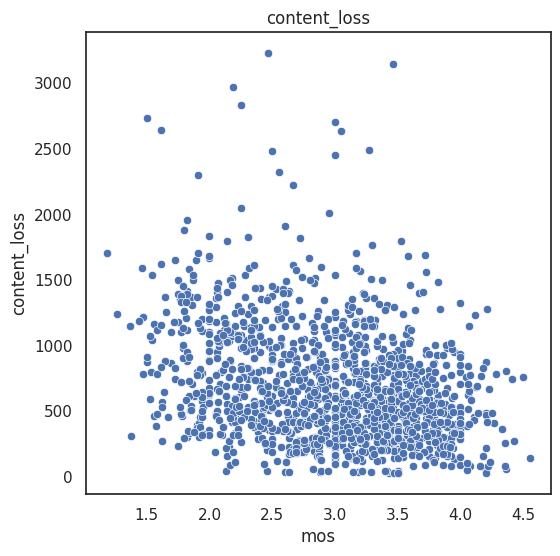

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

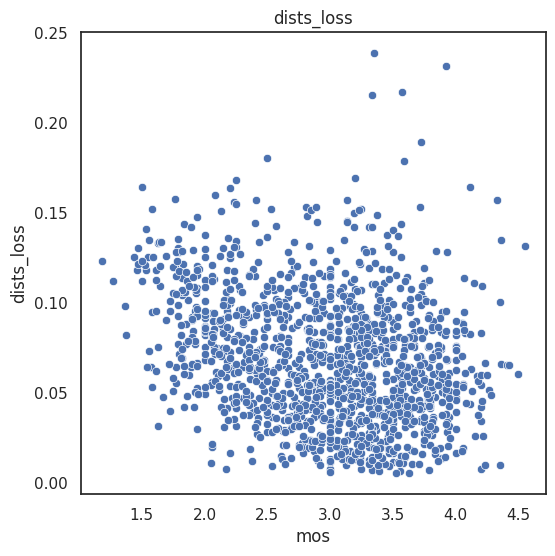

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

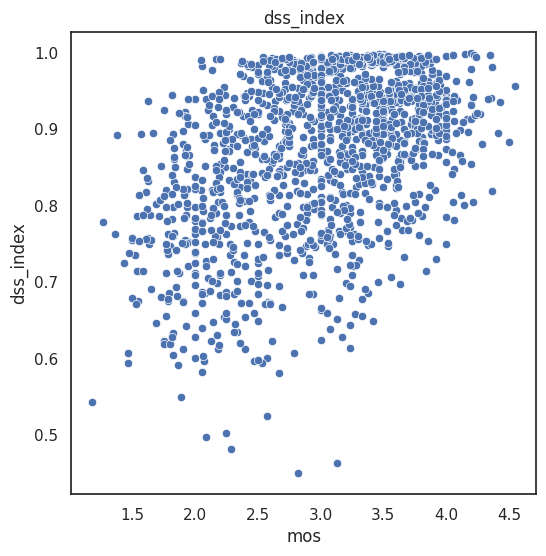

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

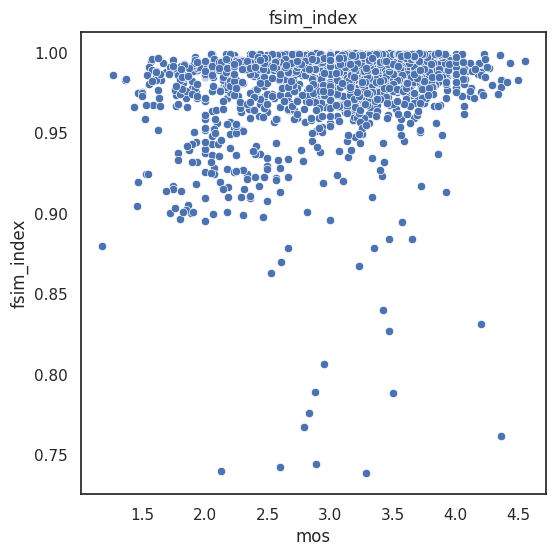

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

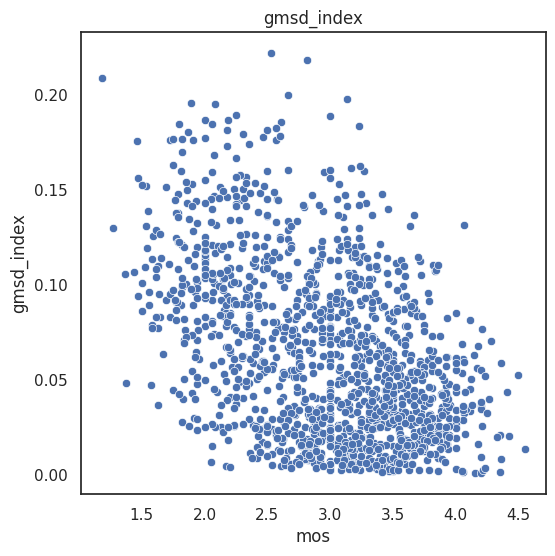

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

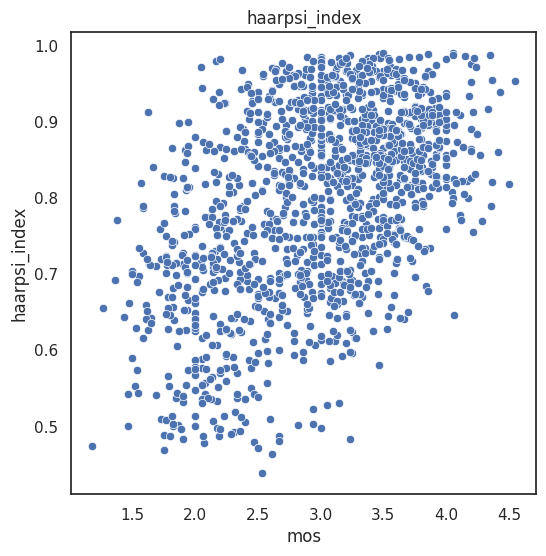

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

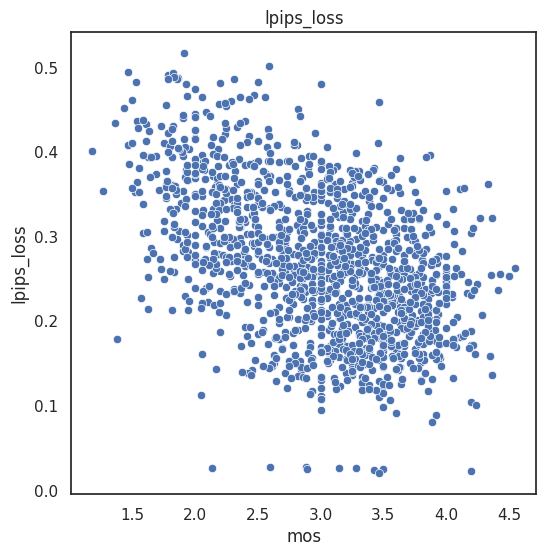

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

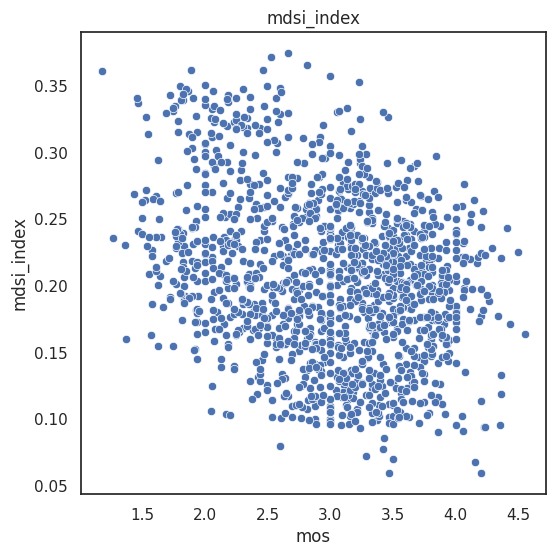

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

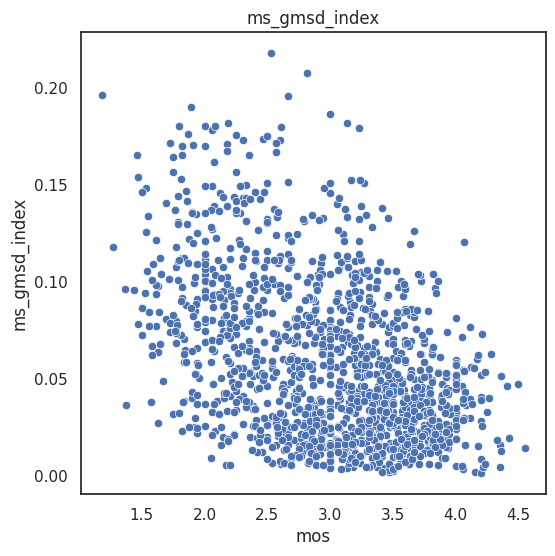

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

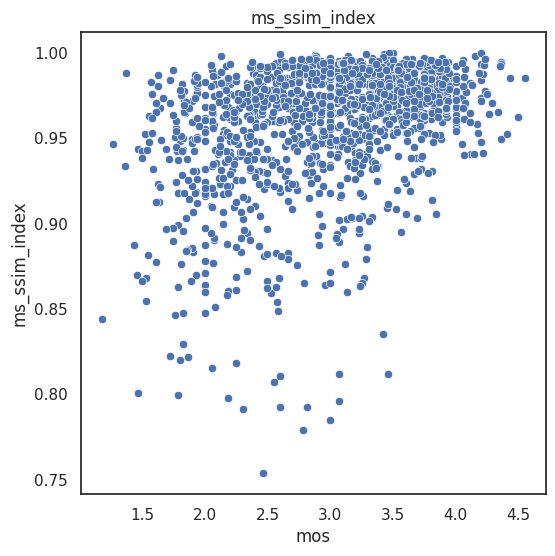

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

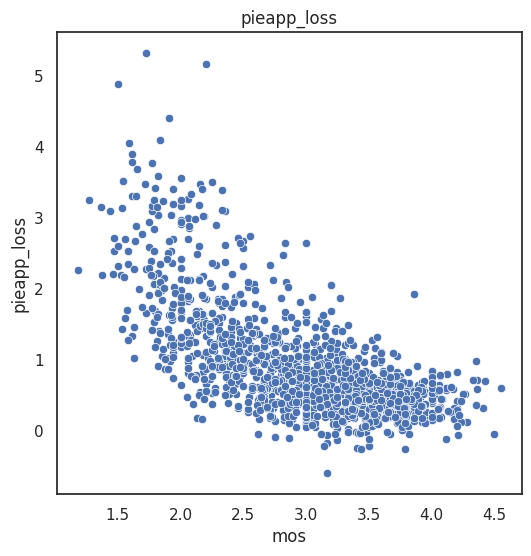

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

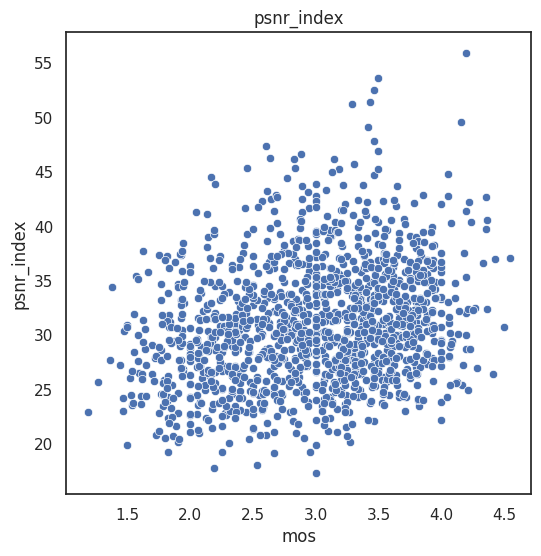

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

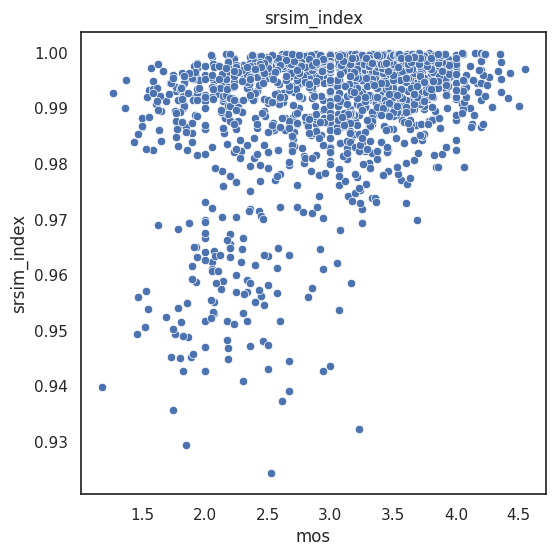

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

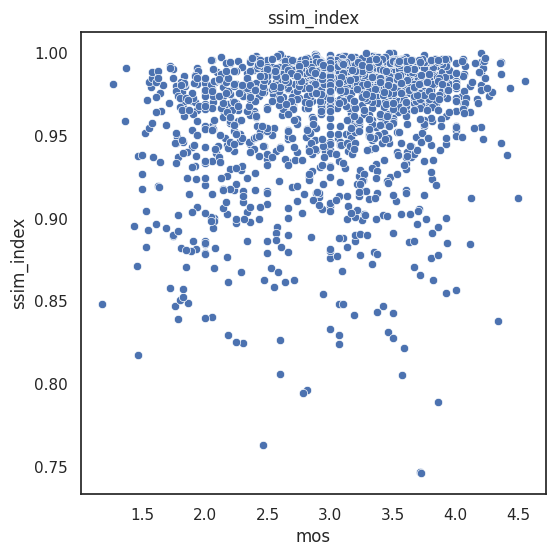

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

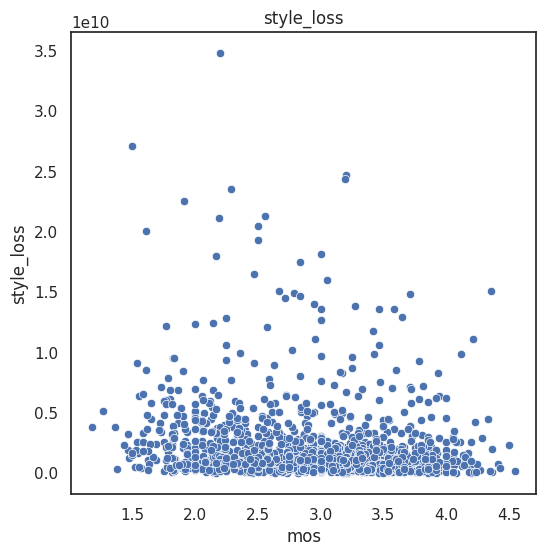

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

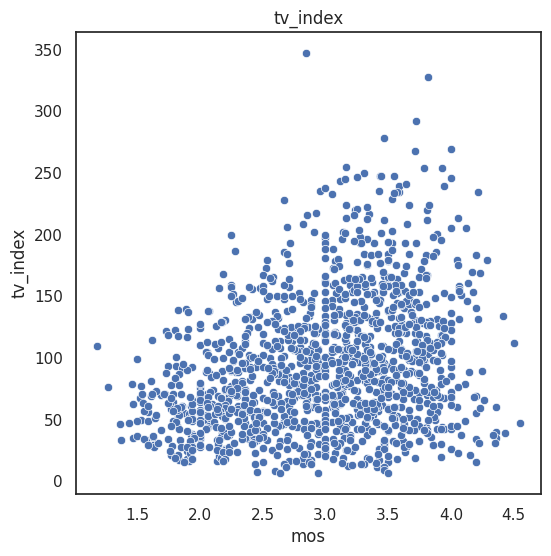

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

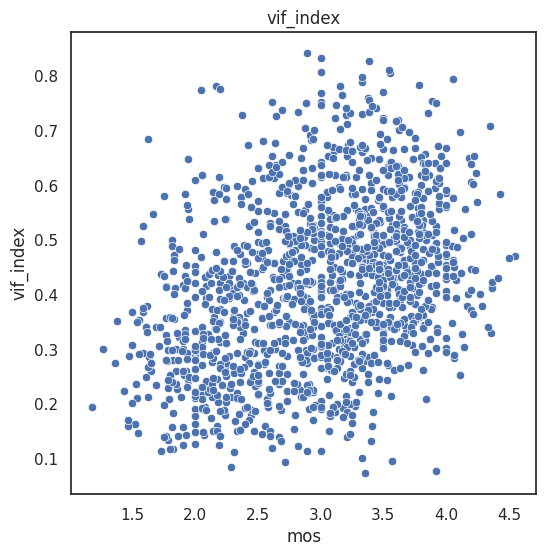

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

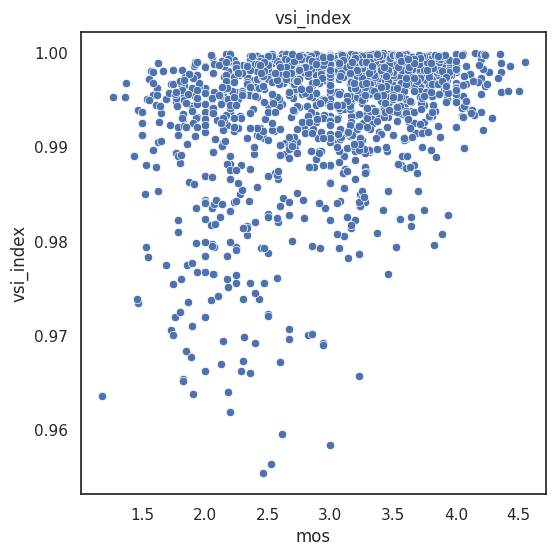

/tmp/ipykernel_3688489/2377139082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
/tmp/ipykernel_3688489/2377139082.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0

cmp vs mos         p         k         s
0   brisque_index -0.361954 -0.296242 -0.427368
1    brisque_loss -0.361954 -0.296242 -0.427368
2    content_loss -0.319872 -0.210652 -0.312050
3      dists_loss -0.277473 -0.188347 -0.279400
4       dss_index  0.440596  0.269774  0.406176
5      fsim_index  0.176592  0.123172  0.182057
6      gmsd_index -0.462093 -0.286770 -0.430519
7   haarpsi_index  0.486310  0.303142  0.453301
8      lpips_loss -0.484135 -0.318773 -0.469345
9      mdsi_index -0.293351 -0.167713 -0.251180
10  ms_gmsd_index -0.443899 -0.275237 -0.412544
11  ms_ssim_index  0.367875  0.231669  0.347559
12    pieapp_loss -0.684144 -0.481195 -0.674278
13     psnr_index  0.248395  0.163509  0.244331
14    srsim_index  0.349108  0.180456  0.269178
15     ssim_index  0.183390  0.135030  0.202623
16     style_loss -0.178955 -0.145875 -0.216631
17       tv_index  0.287275  0.187218  0.276247
18      vif_index  0.362577  0.248305  0.372968
19      vsi_index  0.331644  0.191166  0.289611

In [26]:
models = list(dim.columns.difference(["dis_img", "ref_img", "base_id", "model", "factor", "image_key"]))

qqmetrics = []
    
for m in models:
    
    ax = sns.scatterplot(x="mos", y=m, data=dim_mos)
    ax.set_title(m)
    plt.show()
    qqmetrics.append(
        {
            "cmp vs mos": m,
            "p": dim_mos[[m, "mos"]].corr(method="pearson")["mos"][0],
            "k": dim_mos[[m, "mos"]].corr(method="kendall")["mos"][0],
            "s": dim_mos[[m, "mos"]].corr(method="spearman")["mos"][0]
        }
    )

dmn = pd.DataFrame(qqmetrics)

d(dmn)
    

In [27]:
dmn = dmn.sort_values(by="p", ascending=False)
d(dmn)

print(dmn.round(3).to_latex(index=False))

cmp vs mos         p         k         s
7   haarpsi_index  0.486310  0.303142  0.453301
4       dss_index  0.440596  0.269774  0.406176
11  ms_ssim_index  0.367875  0.231669  0.347559
18      vif_index  0.362577  0.248305  0.372968
14    srsim_index  0.349108  0.180456  0.269178
19      vsi_index  0.331644  0.191166  0.289611
17       tv_index  0.287275  0.187218  0.276247
13     psnr_index  0.248395  0.163509  0.244331
15     ssim_index  0.183390  0.135030  0.202623
5      fsim_index  0.176592  0.123172  0.182057
16     style_loss -0.178955 -0.145875 -0.216631
3      dists_loss -0.277473 -0.188347 -0.279400
9      mdsi_index -0.293351 -0.167713 -0.251180
2    content_loss -0.319872 -0.210652 -0.312050
0   brisque_index -0.361954 -0.296242 -0.427368
1    brisque_loss -0.361954 -0.296242 -0.427368
10  ms_gmsd_index -0.443899 -0.275237 -0.412544
6      gmsd_index -0.462093 -0.286770 -0.430519
8      lpips_loss -0.484135 -0.318773 -0.469345
12    pieapp_loss -0.684144 -0.481195 -0.674278

\begin{tabular}{lrrr}
\toprule
cmp vs mos & p & k & s \\
\midrule
haarpsi_index & 0.486000 & 0.303000 & 0.453000 \\
dss_index & 0.441000 & 0.270000 & 0.406000 \\
ms_ssim_index & 0.368000 & 0.232000 & 0.348000 \\
vif_index & 0.363000 & 0.248000 & 0.373000 \\
srsim_index & 0.349000 & 0.180000 & 0.269000 \\
vsi_index & 0.332000 & 0.191000 & 0.290000 \\
tv_index & 0.287000 & 0.187000 & 0.276000 \\
psnr_index & 0.248000 & 0.164000 & 0.244000 \\
ssim_index & 0.183000 & 0.135000 & 0.203000 \\
fsim_index & 0.177000 & 0.123000 & 0.182000 \\
style_loss & -0.179000 & -0.146000 & -0.217000 \\
dists_loss & -0.277000 & -0.188000 & -0.279000 \\
mdsi_index & -0.293000 & -0.168000 & -0.251000 \\
content_loss & -0.320000 & -0.211000 & -0.312000 \\
brisque_index & -0.362000 & -0.296000 & -0.427000 \\
brisque_loss & -0.362000 & -0.296000 & -0.427000 \\
ms_gmsd_index & -0.444000 & -0.275000 & -0.413000 \\
gmsd_index & -0.462000 & -0.287000 & -0.431000 \\
lpips_loss & -0.484000 & -0.319000 & -0.469000 \\
pi